1.Remover dados duplicados

In [ ]:
def remover_duplicatas(arquivo_entrada, arquivo_saida):
    # Ler o arquivo CSV
    try:
        df = pd.read_csv(arquivo_entrada)
    except FileNotFoundError:
        print("Arquivo de entrada não encontrado.")
        return

    # Remover linhas duplicadas
    df_sem_duplicatas = df.drop_duplicates()

    # Gravar o novo arquivo CSV
    try:
        df_sem_duplicatas.to_csv(arquivo_saida, index=False)
        print(f"Arquivo '{arquivo_saida}' gravado com sucesso.")
    except Exception as e:
        print(f"Erro ao gravar o arquivo '{arquivo_saida}': {str(e)}")


# Exemplo de uso:
arquivo_entrada = 'arquivo_sera_verificado.csv'
arquivo_saida = 'arquivo_tratado.csv'

remover_duplicatas(arquivo_entrada, arquivo_saida)


2.Desafio: Transformar para maiúsculas e remover acentos

In [ ]:
def remover_acentos(texto):
    return unidecode(texto)


def converter_para_maiusculas_e_remover_acentos(arquivo_entrada, arquivo_saida):
    try:
        with open(arquivo_entrada, 'r', newline='', encoding='utf-8') as arquivo_entrada:
            leitor_csv = csv.reader(arquivo_entrada)
            dados = list(leitor_csv)

            # Convertendo os dados para maiúsculas e removendo acentos
            dados_maiusculos_sem_acentos = [[remover_acentos(item.upper()) for item in linha] for linha in dados]

        with open(arquivo_saida, 'w', newline='', encoding='utf-8') as arquivo_saida:
            escritor_csv = csv.writer(arquivo_saida)
            escritor_csv.writerows(dados_maiusculos_sem_acentos)

        print("Conversão para maiúsculas e remoção de acentos concluídas com sucesso!")

    except FileNotFoundError:
        print("Arquivo não encontrado.")
    except Exception as e:
        print("Ocorreu um erro:", e)


# Exemplo de uso da função
arquivo_entrada = 'arquivo_a_ser_tratado.csv'
arquivo_saida = 'arquivo_tratado.csv'
converter_para_maiusculas_e_remover_acentos(arquivo_entrada, arquivo_saida)

3.Adicionar zero na frente

In [ ]:
def ajustar_csv(arquivo_entrada, arquivo_saida):
    # Lê o arquivo CSV
    df = pd.read_csv(arquivo_entrada)

    # Ajusta os valores
    for coluna in df.columns:
        df[coluna] = df[coluna].astype(str).apply(lambda x: x.zfill(3))

    # Salva o arquivo ajustado
    df.to_csv(arquivo_saida, index=False)
    print("Arquivo ajustado salvo com sucesso!")


# Exemplo de uso da função
arquivo_entrada = 'arquivo_a_ser_tratado.csv'
arquivo_saida = 'arquivo_tratado.csv'
ajustar_csv(arquivo_entrada, arquivo_saida)

4.Substitui Abreviações a partir de um dicionário de padrões

In [ ]:
import csv


def substituir_abreviacoes(texto, dicionario_abreviacoes):
    palavras = texto.split()
    novo_texto = []
    for palavra in palavras:
        if palavra in dicionario_abreviacoes:
            novo_texto.append(dicionario_abreviacoes[palavra])
        else:
            novo_texto.append(palavra)
    return ' '.join(novo_texto)


# Dicionário de abreviações
abreviacoes = {
    'LAT': 'LATITUDE',
    'LON': 'LONGITUDE',
    'EM': 'ESCOLA MUNICIPAL',
    'EM.': 'ESCOLA MUNICIPAL',
    'E.M': 'ESCOLA MUNICIPAL',
    'E.M.': 'ESCOLA MUNICIPAL',
    'ENG.': 'ENGENHEIRO',
    'S/Ndeg.': 'SEM NUMERO',
    'S/N.deg': 'SEM NUMERO',
    'S/Ndeg': 'SEM NUMERO',
    'S/No': 'SEM NUMERO',
    'S/NO': 'SEM NUMERO',
    'S/N.o': 'SEM NUMERO',
    'S/N': 'SEM NUMERO',
    'R.': 'RUA',
    'MAL.': 'MARECHAL',
    'ALM.': 'ALMIRANTE',
    'CIEP': 'CENTROS INTEGRADOS DE EDUCACAO PUBLICA',
    'ESTR.': 'ESTRADA',
    'JR': 'JUNIOR',
    'AV.': 'AVENIDA',
    'AV': 'AVENIDA',
    'PCA.': 'PRACA',
    'DEL': 'DELEGADO',
    'JPA': 'JACAREPAGUA',
    'SD.': 'SOLDADO',
    'CONJ': 'CONJUNTO',
    'CONJ.': 'CONJUNTO',
    'SEN.': 'SENADOR',

}

# Exemplo de uso da função
arquivo_entrada = 'arquivo_a_ser_tratado.csv'
arquivo_saida = 'arquivo_tratado.csv'

# Abrir o arquivo CSV de entrada e gerar o novo arquivo CSV com as abreviações substituídas
with open(arquivo_entrada, 'r', newline='', encoding='utf-8') as arquivo_entrada, \
        open(arquivo_saida, 'w', newline='', encoding='utf-8') as arquivo_saida:
    leitor_csv = csv.reader(arquivo_entrada)
    escritor_csv = csv.writer(arquivo_saida)

    # Processar cada linha do arquivo CSV de entrada
    for linha in leitor_csv:
        nova_linha = [substituir_abreviacoes(campo, abreviacoes) for campo in linha]
        escritor_csv.writerow(nova_linha)

print("Conversão concluída. Verifique o arquivo", arquivo_saida)

5.Ajustar casas decimais

In [ ]:

from unidecode import unidecode


def remove_special_characters(input_string):
    # Remove caracteres especiais e acentos
    return unidecode(input_string)


def format_csv(input_file, output_file):
    # Abrir o arquivo de entrada no modo de leitura e o arquivo de saída no modo de escrita
    with open(input_file, 'r', newline='', encoding='utf-8') as file_in, \
            open(output_file, 'w', newline='', encoding='utf-8') as file_out:
        # Criar um leitor CSV e um escritor CSV
        reader = csv.reader(file_in, delimiter=',')
        writer = csv.writer(file_out, delimiter=',')

        # Ler a primeira linha (cabeçalho) do arquivo de entrada e escrevê-lo no arquivo de saída
        headers = next(reader)
        writer.writerow(headers)

        # Iterar sobre as linhas restantes do arquivo de entrada
        for row in reader:
            # Remover caracteres especiais e acentos
            row = [remove_special_characters(cell) for cell in row]

            # Formatar as colunas de latitude e longitude
            row[4] = f'{float(row[4].replace(",", ".")):.5f}'  # Latitude
            row[5] = f'{float(row[5].replace(",", ".")):.5f}'  # Longitude

            # Escrever a linha formatada no arquivo de saída
            writer.writerow(row)


# Exemplo de uso da função
arquivo_entrada = 'arquivo_a_ser_tratado.csv'
arquivo_saida = 'arquivo_tratado.csv'
format_csv(arquivo_entrada, arquivo_saida)
print(f'Arquivo formatado salvo como "{arquivo_saida}"')

6.Exibindo as bases de dados tratadas

In [14]:
import pandas as pd

# Exemplo de uso
escolas = open('escolas.csv', 'r')
df = pd.DataFrame(data=escolas)
df.head()



,0
0,"ID_ESCOLA,ESCOLAS_POSTOS,BAIRRO,ENDERECO,LATIT..."
1,"178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFI..."
2,"634,ESCOLA MUNICIPAL ALICE DO AMARAL PEIXOTO,B..."
3,"483,ESCOLA MUNICIPAL CELESTINO SILVA,CENTRO,RU..."
4,"476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRIS..."


7. Desafio: Representação da Melhor Rota

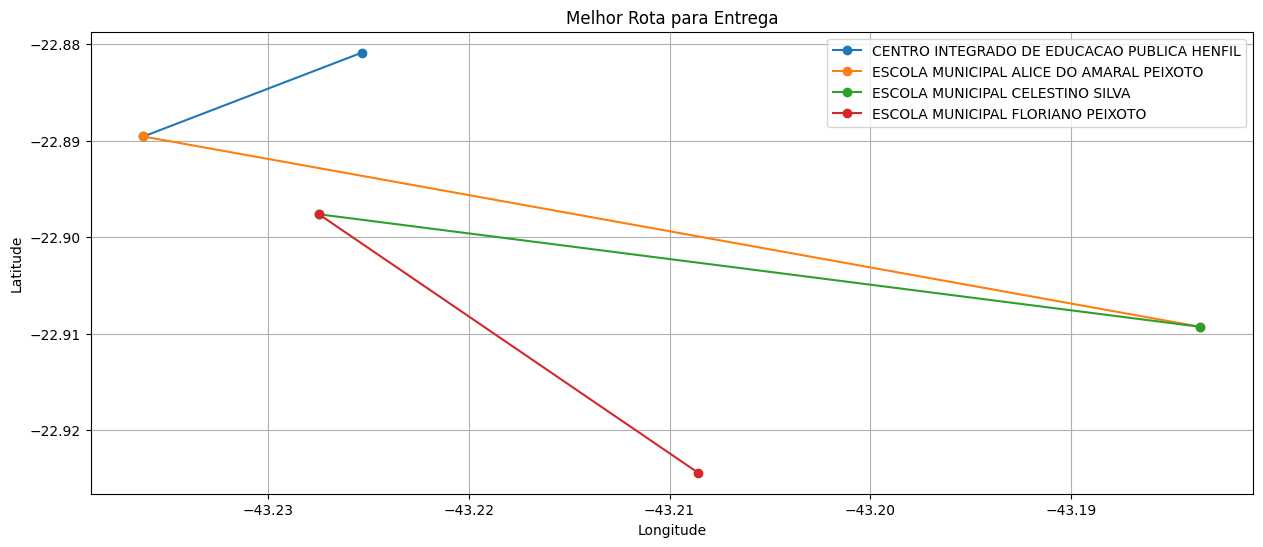

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Use o método read_csv do Pandas para ler o arquivo CSV diretamente em um DataFrame
df = pd.read_csv(
    'melhor_rota.csv')  # Certifique-se de que 'rota_entrega.csv' contém as colunas 'LATITUDE', 'LONGITUDE' e 'Classificacao'

# Ordena o DataFrame com base na coluna 'Classificacao' e pega as 5 melhores rotas
top_routes = df.sort_values(by='ESCOLAS_POSTOS').head(5)

# Plota um gráfico de linhas para as 5 melhores rotas
plt.figure(figsize=(15, 6))

# Itera sobre as 5 melhores rotas e plota cada uma delas
for i in range(len(top_routes) - 1):
    plt.plot([top_routes.iloc[i]['LONGITUDE'], top_routes.iloc[i + 1]['LONGITUDE']],
             [top_routes.iloc[i]['LATITUDE'], top_routes.iloc[i + 1]['LATITUDE']],
             marker='o', linestyle='-', label=top_routes.iloc[i]['ESCOLAS_POSTOS'])

plt.title('Melhor Rota para Entrega')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Adiciona a legenda ao gráfico
plt.legend()
plt.show()


In [15]:
import pandas as pd

# Exemplo de uso
escolas = open('melhor_rota.csv', 'r')
df = pd.DataFrame(data=escolas)
df.head()

,0
0,"ID_ESCOLA,ESCOLAS_POSTOS,BAIRRO,ENDERECO,LATIT..."
1,"178,CENTRO INTEGRADO DE EDUCACAO PUBLICA HENFI..."
2,"634,ESCOLA MUNICIPAL ALICE DO AMARAL PEIXOTO,B..."
3,"483,ESCOLA MUNICIPAL CELESTINO SILVA,CENTRO,RU..."
4,"476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SAO CRIS..."
